# Exercise 1: Python and sounds

This exercise aims to get familiar with some basic audio operations using Python. There are four parts to it: 1) Reading an audio file, 2) Basic operations with audio, 3) Python array indexing, and 4) Downsampling audio - Changing the sampling rate. 

Before doing the exercise, please go through the general information for all the exercises given in `README.txt` of the `notebooks` directory. 

### Relevant concepts

__Python:__ Python is a powerful and easy to learn programming language, which is used in a wide variety of application areas. More information in https://www.python.org/. We will use python in all the exercises and in this first one you will start learning about it by performing some basic operations with sound files. 

__Jupyter notebooks:__ Jupiter notebooks are interactive documents containing live code, equations, visualizations and narrative text. More information in https://jupyter.org/. It supports Python and all the exercises here use it.

__Wav file:__ The wav file format is a lossless format to store sounds on a hard drive. Each audio sample is stored as a 16 bit integer number (sometimes also as 24 bit integer or 32 bit float). In this course we will work with only one type of audio files. All the sound files we use in the assignments should be wav files that are mono (one channel), in which the samples are stored in 16 bits, and that use (most of the time) the sampling rate of 44100 Hz. Once read into python, the samples will be converted to floating point values with a range from -1 to 1, resulting in a one-dimensional array of floating point values.

## Part 1 - Reading in an audio file
Write a function that reads an audio file and returns 10 consecutive samples of the file starting from 
the 50001th sample. This means that the output should exactly contain the 50001th sample to the 50010th 
sample (10 samples). 

The input to the function is the file name (including the path), plus the location of first sample and the number of consecutive samples to take, and the output should be a numpy array.

If you use the `wavread()` function from the `utilFunctions` module available in the `software/models` directory, the input samples will be automatically converted to a numpy array of floating point numbers with a range from -1 to 1, which is what we want. 

Remember that in python, the index of the first sample of an array is 0 and not 1.

In [2]:
import sys
import os
import numpy as np
# to use this notebook with colab uncomment the next line
# !git clone https://github.com/MTG/sms-tools.git
# and change the next line to sys.path.append('sms-tools/software/models/')
sys.path.append('../software/models/')
from utilFunctions import wavread, wavwrite

In [3]:
from scipy.io.wavfile import read

o_fs, o_x = read('../sounds/piano.wav')
print(o_x.dtype.name)

fs, x = wavread('../sounds/piano.wav')
np.where(x==-0.04541154)

int16


(array([], dtype=int64),)

In [4]:
# E1 - 1.1: Complete the read_audio_samples() function

def readAudio(input_file, first_sample=50001, num_samples=10):
    """Read num_samples samples from an audio file starting at sample first_sample
    
    Args:
        input_file (str): path of a wav file      
    
    Returns:
        np.array: numpy array containing the selected samples
    
    """
    
    fs, x = wavread(input_file)

    return x[first_sample-1: first_sample-1+num_samples]

You can use as input the sound files from the sounds directory, thus using a relative path to it. If you run the `readAudio()` function using the `piano.wav` sound file as input, with the default arguments, it should return the following samples:
```
array([-0.06213569, -0.04541154, -0.02734458, -0.0093997, 0.00769066, 0.02319407, 0.03503525, 0.04309214, 0.04626606,  0.0441908], dtype=float32)
```

In [5]:
# E1 - 1.2: Call read_audio_samples() with the proposed input sound and default arguments

### Your code here
readAudio('../sounds/piano.wav')

array([-0.06213379, -0.04541016, -0.02734375, -0.00939941,  0.00769043,
        0.02319336,  0.03503418,  0.04309082,  0.04626465,  0.04418945],
      dtype=float32)

## Part 2 - Basic operations with audio

The function `minMaxAudio()` should read an audio file and return the minimum and  maximum values of the audio samples in that file. The input to the function is the wav file name (including the path) and the output should be two floating point values returned as a tuple.

In [6]:
# E1 - 2.1: Complete function minMaxAudio()

def min_max_audio(input_file):
    """Compute the minimum and maximum values of the audio samples in the input file
    
    Args:
        inputFile(str): file name of the wav file (including path)
    
    Returns:
        tuple: minimum and maximum value of the audio samples, like: (min_val, max_val)
    """
    ### Your code here

    fs, x = wavread(input_file)

    min_val = min(x)
    max_val = max(x)

    return (min_val, max_val)


If you run `min_max_audio()` using `oboe-A4.wav` as input, it should return the following output: 

```
(-0.83486432, 0.56501967)
```

(-0.83483887, 0.56500244)

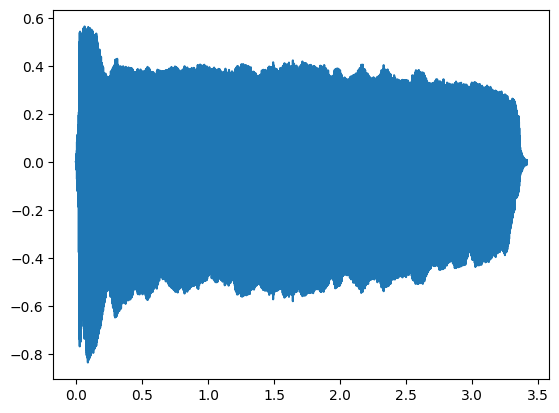

In [36]:
# E1 - 2.2: Plot input sound with x-axis in seconds, and call min_max_audio() with the proposed sound file

### Your code here
import matplotlib.pyplot as plt
import IPython.display as ipd

# plot the graph in seconds
fs, x = wavread('../sounds/oboe-A4.wav')


n_samples = len(x)
sampling_period = 1/fs
time_axis = [i*sampling_period for i in range(n_samples)]

fig1 = plt.figure(1)
plt.plot(time_axis, x, figure=fig1)



min_max_audio('../sounds/oboe-A4.wav')

## Part 3 - Python array indexing

For the function `hop_samples()`, given a numpy array `x`, it should return every Mth element of `x`, starting from the first element. The input arguments to this function are a numpy array `x` and a positive integer `M` such that `M` < number of elements in `x`. The output of this function should be a numpy array.

In [30]:
# E1 - 3.1: Complete the function hop_samples()

def hop_samples(x, M):
    """Return every Mth element of the input array
    
    Args:
        x(np.array): input numpy array
        M(int): hop size (positive integer)
    
    Returns:
        np.array: array containing every Mth element in x, starting from the first element in x
    """
    if M >= len(x):
        raise ValueError(f'Invalid value for M. Expected {M} < {len(x)}.')
    
    return x[::M]


If you run the function`hop_samples()` with `x = np.arange(10)` and `M = 2` as inputs, it should return: 

```
array([0, 2, 4, 6, 8])
```

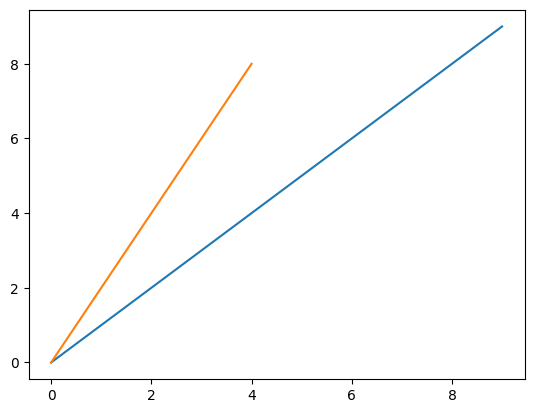

In [33]:
# E1 - 3.2: Plot input array, call hop_samples() with proposed input, and plot output array


plt.plot(np.arange(10))

hop_samples(np.arange(10), 2)

plt.plot(hop_samples(np.arange(10), 2))

## Part 4 - Downsampling


One of the required processes to represent an analog signal inside a computer is sampling. The sampling rate is the number of samples obtained in one second when sampling a continuous analog signal to a discrete digital signal. As mentioned we will be working with wav audio files that have a sampling rate of 44100 Hz, which is a typical value. Here you will learn a simple way of changing the original sampling rate of a sound to a lower sampling rate, and will learn the implications it has in the audio quality.

The function `down_sample_audio()` has as input an audio file with a given sampling rate, it should apply downsampling by a factor of `M` and return a down-sampled version of the input samples. The sampling rates and downsampling factors to use have to be integer values.

From the output samples if you need to create a wav audio file from an array, you can use the `wavwrite()` function from the `utilFunctions.py` module. However, in this exercise there is no need to write an audio file, we will be able to hear the sound without creating a file, just playing the array of samples.

In [ ]:
# E1 - 4.1: Complete function down_sample_audio()

def down_sample_audio(input_file, M):
    """Downsample by a factor of M the input signal
    
    Args:
        input_file(str): file name of the wav file (including path)
        M(int): downsampling factor (positive integer)
        
    Returns:
        tuple: input samples (np.array), original sampling rate (int), down-sampled signal (np.array), 
               and new sampling rate (int), like: (x, fs, y, fs_new) 
    """

    fs, x = wavread(input_file)

    if M >= len(x):
        raise ValueError(f'Invalid value for M. Expected {M} < {len(x)}.')

    fs_new = fs / M
    y = x[::M]

    return (x, fs, y, fs_new)


Test cases for `down_sample_audio()`:

_Test Case 1:_ Use the file from the sounds directory `vibraphone-C6.wav` and a downsampling factor of `M=14`.

_Test Case 2:_ Use the  file from the sounds directory `sawtooth-440.wav` and a downsampling factor of `M=14`.

To play the output samples, import the `Ipython.display` package and use `ipd.display(ipd.Audio(data=y, rate=fs_new))`. To visualize the output samples import the `matplotlib.pyplot` package and use `plt.plot(x)`.

You can find some related information in https://en.wikipedia.org/wiki/Downsampling_(signal_processing)

In [ ]:
import IPython.display as ipd
import matplotlib.pyplot as plt

Test Case 1 - Original Version:


Test Case 1 - Downsampled Version:


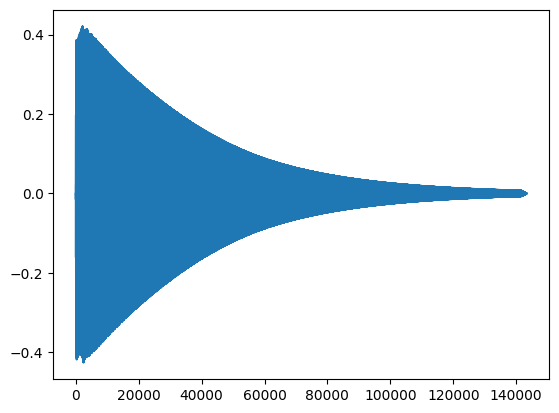

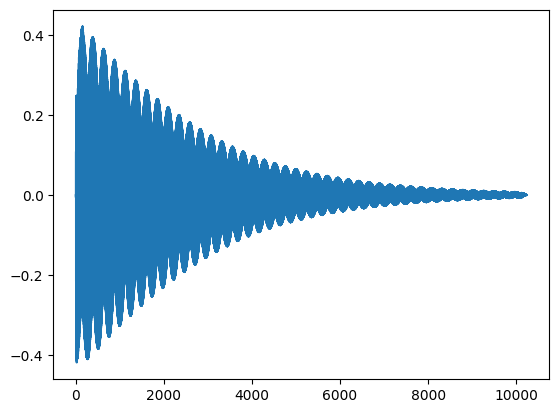

In [ ]:
# E1 - 4.2: Plot and play input sounds, call the function down_sample_audio() for the two test cases, 
# and plot and play the output sounds. 

### Test Case 1:
t1_x, t1_fs, t1_y, t1_new_fs = down_sample_audio('../sounds/vibraphone-C6.wav', 14)
print("Test Case 1 - Original Version:")
ipd.display(ipd.Audio(data=t1_x, rate=t1_fs))
fig1 = plt.figure(1)
plt.plot(t1_x, figure=fig1)

print("Test Case 1 - Downsampled Version:")

ipd.display(ipd.Audio(data=t1_y, rate=t1_new_fs))
fig2 = plt.figure(2)
plt.plot(t1_y, figure=fig2)

Test Case 2 - Original Version:


Test Case 2 - Downsampled Version:


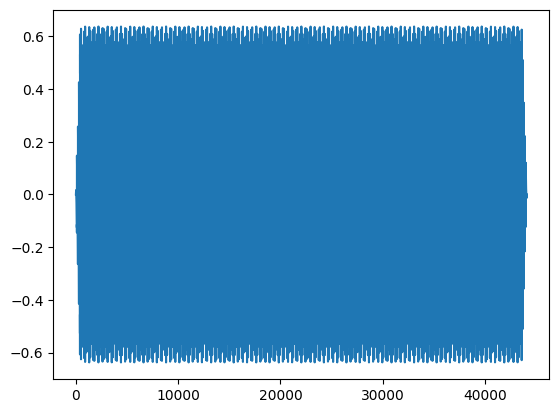

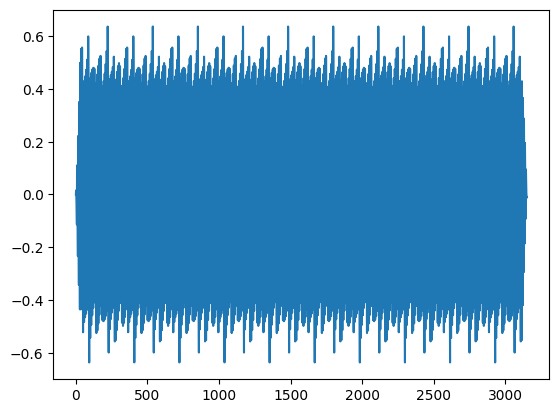

In [ ]:
### Test Case 2:

t2_x, t2_fs, t2_y, t2_new_fs = down_sample_audio('../sounds/sawtooth-440.wav', 14)
print("Test Case 2 - Original Version:")
ipd.display(ipd.Audio(data=t2_x, rate=t2_fs))
fig1 = plt.figure(1)
plt.plot(t2_x, figure=fig1)

print("Test Case 2 - Downsampled Version:")

ipd.display(ipd.Audio(data=t2_y, rate=t2_new_fs))
fig2 = plt.figure(2)
plt.plot(t2_y, figure=fig2)

In [ ]:
# E1 - 4.3: Explain the results of part 4. What happened to the output signals compared to the input ones? 
# Is there a difference between the 2 cases? Why? How could we avoid damaging the signal when downsampling it?

> What happened to the output signals compared to the input ones? Is there a difference between the 2 cases?

### Observation 1 - Loss of information at the End due to Downsampling

In [ ]:
print(f"Original length: {len(t1_x)}")
print(f"Downsampled length: {len(t1_y)}")
print(len(t1_x) / len(t1_y))

print()

print(f"Original length: {len(t2_x)}")
print(f"Downsampled length: {len(t2_y)}")
print(len(t2_x) / len(t2_y))


Original length: 143336
Downsampled length: 10239
13.999023342123253

Original length: 44100
Downsampled length: 3150
14.0


Interestingly we can see in the first test case is not perfectly divisible by 14. So despite it not sounding any different from the original file when we play it back it is possible that we lost some information at the end of the sound file or that the end of the file is distorted. We may not hear it because the sound starts to fade out towards the end.

Let's try to reverse the sound and see if we can hear the distortion if the sound is reversed:

In [ ]:
fs, x = wavread('../sounds/vibraphone-C6.wav')

reversed_x = x[::-1]
downsampled_x = reversed_x[::14]
downsampled_fs = fs/14

ipd.display(ipd.Audio(data=reversed_x, rate=fs))
ipd.display(ipd.Audio(data=downsampled_x, rate=downsampled_fs))

After reversing the sound we can hear a slight difference between the two sounds. In the downsampled version it sounds like the sound cuts off much sooner than in the original version. This phenomenon also does not seem to happen in the second test case because the length of the input is perfectly divisible by our downsampling factor (M) of 14

### Observation 2 - Lossy vs Lossless

As mentioned in the first observation, in the first test case there are no noticable audible differences between the original and the downsampled version unless it is reveresed. This is much different to the second test case where it is clearly noticable that there is a distinct audible difference between both versions. Where the downsampled version doesn't sound as clear.

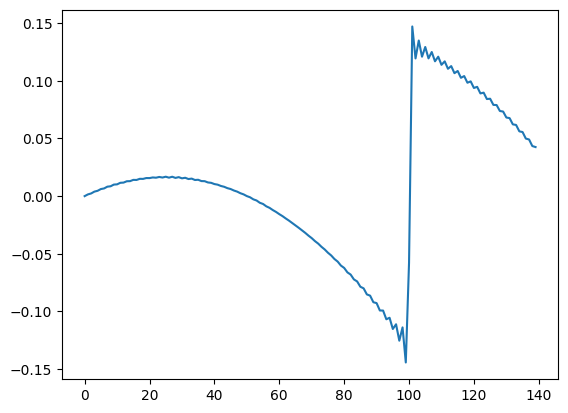

In [ ]:
plt.plot(t2_x[0:140])

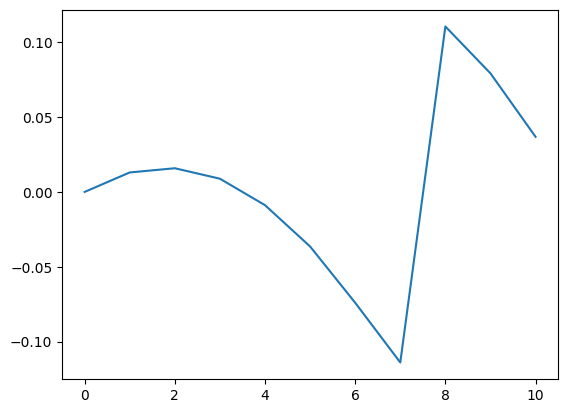

In [ ]:
plt.plot(t2_y[0:11])

The loss in audio quality becomes a bit more obvious when we plot the first 140 samples of the input and the first 10 samples from the downsampled output. Given what I understand about downsampling these two graphs should be identical or at least a close approximation of each other, since the first 10 samples of the downsampled output should be equivalent to every 14th sample in the original. As we can see in the graph the fine details in the fluctuations of the sound are probably the noticable differences that we hear.

Let's try to do the same experiment with the first test case to see if we notice any differences.

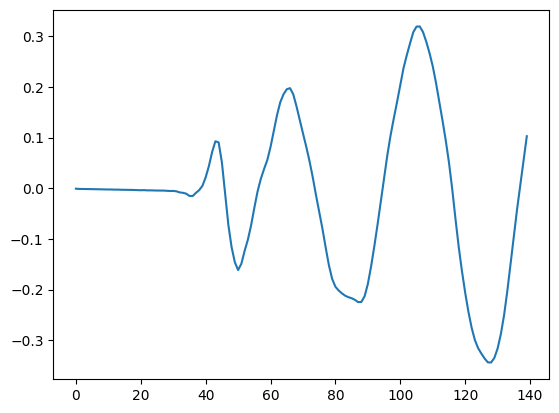

In [ ]:
plt.plot(t1_x[0:140])

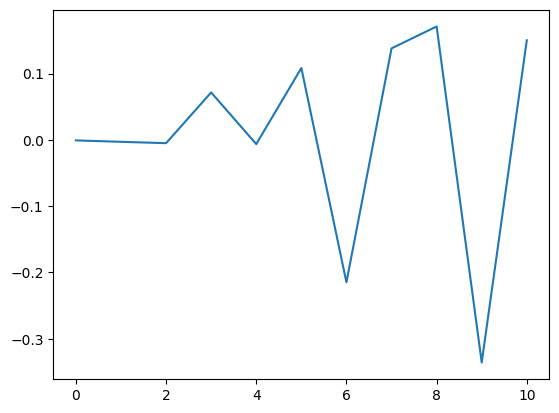

In [ ]:
plt.plot(t1_y[0:11])

In the first test case there is a slight difference in the graphs but the overall shape of the graph still looks the same, which may be the reason why the sound of the downsampled output in test case 1 sounds lossless.

> How can we avoid damaging the signal when downsampling it?

Based on my research there are a couple of ways that we can avoid damaging the signal when we downsample it:

1. Apply an anti-aliasing filter before downsampling
2. Carefully selecting the downsampling factor (M)
3. Dithering, or adding a small amount of random noise to the digital audio signal